In [1]:
import sys
sys.path.append("..")
import splitwavepy as sw

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# generate a list of error surfaces

listM = []
for x in range(20):
    listM.append(sw.EigenM(fast=40,lag=2.3,delta=0.1,noise=0.1))
    

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


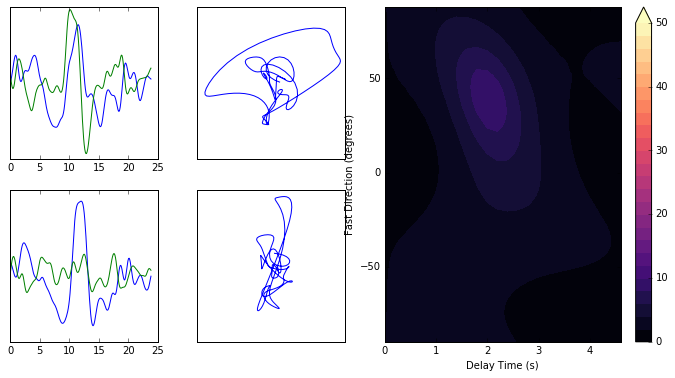

In [21]:
listM[3].plot()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


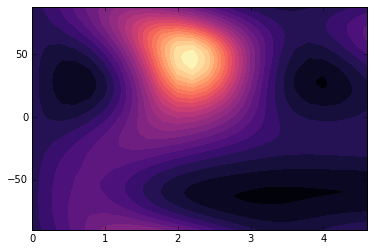

In [22]:
def stackL1L2(listM):
    """
    Stack a list of simple lam1/lam2 surfaces
    """  
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack = stack + (M.lam1 / M.lam2)
        
    return stack / len(listM)

stkL1L2 = stackL1L2(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkL1L2,25,cmap='magma')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


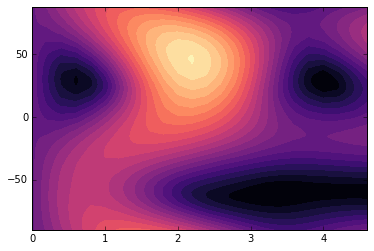

In [23]:
def stackWS(listM):
    """stack Lam2 surfaces,
    following Wolfe and Silver,
    normalize by minlam2"""
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack = stack + (M.lam2/M.lam2.min())
        
    return stack / len(listM)

stkWS = stackWS(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkWS,25,cmap='magma_r')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


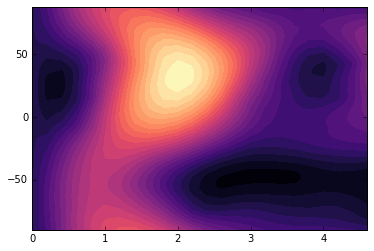

In [19]:
def stackRH(listM):
    """stack Lam2 surfaces,
    following Restivo and Helffrich,
    normalize by minlam2 and weight by SNR"""
    
    stack = np.zeros(listM[0].degs.shape)
    sumwt = 0.
    
    for M in listM:
        stack = stack + M.snrRH * (M.lam2/M.lam2.min())
        sumwt += M.snrRH
    return stack / sumwt

stkRH = stackRH(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkRH,25,cmap='magma_r')
plt.show()    

In [27]:
listM[0].lagprofile

array([ 107.83546827,  119.53155778,  149.99163927,  191.46017825,
        245.7684775 ,  313.50128124,  387.22942625,  442.77125641,
        450.23132757,  410.620331  ,  351.55423847,  293.28304079,
        242.5528246 ,  200.15403874,  165.4971506 ,  138.00660658,
        118.46681411,  115.75108423,  122.68529583,  134.52948366,
        148.10229445,  160.20929781,  167.94187305,  169.89314666])